In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
import PIL
import os

C:\Users\Teikkenn\AppData\Local\conda\conda\envs\ann\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_data_original(dataset, standardize=True):
    """
    :param dataset:
    :param standardize:
    :return:
    """

    features = dataset['arr'][:, 0]
    features = np.array([feature for feature in features])
    features = np.reshape(features, (features.shape[0], features.shape[1] * features.shape[2]))

    if standardize:
        features = StandardScaler().fit_transform(features)

    labels = dataset['arr'][:, 1]
    labels = np.array([label for label in labels])

    return features, labels


def one_hot_encode(labels):
    """
    :param labels:
    :return:
    """
    one_hot = np.zeros((labels.shape[0], labels.max() + 1))
    one_hot[np.arange(labels.shape[0]), labels] = 1
    labels = one_hot
    labels[labels == 0] = -1
    return labels



def create_dataframe(path):
    columnas = []
    etiqueta = []
    HoG = []
    df = {}
    for i in range(1,1025):
        columnas.append("pixel"+str(i))
    labels = os.listdir("./malimg_paper_dataset_imgs")
    contador = 0
    for i in labels:
        for j in os.listdir("./malimg_paper_dataset_imgs/"+i):
            img = PIL.Image.open("./malimg_paper_dataset_imgs/"+i+"/"+j).convert('LA')
            img = img.resize((32, 32))
            arr1 = np.array(img.getdata(0))
            etiqueta.append(i)
            df[contador] = arr1
            contador = contador + 1      
    df2 = pd.DataFrame(df).T
    df2.columns = columnas
    df3 = pd.DataFrame(etiqueta,columns = ['label'])  
    
    df_final =pd.concat([df2, df3], axis=1)
    return df_final

def createModel():
    model = Sequential()
    model.add(Conv2D(1024, (3, 3), padding='same', activation='tanh', input_shape=(32,32,1)))
    model.add(Conv2D(1024, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='tanh'))
    model.add(Conv2D(512, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation='tanh'))
    model.add(Conv2D(256, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.25))
    model.add(Dense(9, activation='softmax'))
    
    return model


def load_data():
    encode_dic = {"Adialer.C": 0 , 'Agent.FYI': 1,'Allaple.A':2,'Allaple.L':2,'Alueron.gen!J':4,'Autorun.K':5,'C2LOP.P':4,'C2LOP.gen!g':4,'Dialplatform.B':1,'Dontovo.A':6,'Fakerean':7,'Instantaccess':1,'Lolyda.AA1':8,'Lolyda.AA2':8,'Lolyda.AA3':8,'Lolyda.AT':8,'Malex.gen!J':4,'Obfuscator.AD':6,'Rbot!gen':2,'Skintrim.N':4,'Swizzor.gen!E':6,'Swizzor.gen!I':6,'VB.AT':3,'Wintrim.BX':6,'Yuner.A':3}
    df = create_dataframe("./malimg_paper_dataset_imgs")
    df['label'] = df['label'].replace(encode_dic)
    X_df = df.drop('label', axis=1)
    y_df = df['label']
    X_cross, X_test, y_cross, y_test = train_test_split(X_df, y_df,test_size=0.25, random_state=42)
    X_train, X_val, y_train, y_val =  train_test_split(X_df, y_df,test_size=0.40, random_state=42)
    return(X_train,X_val,X_test,y_train,y_val,y_test)


def SVM_tarea3(kernel,x_tr, x_v, x_t, y_tr, y_v , y_t): 
    error_train = []
    error_test = []
    error_val = []
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):            
        model = SVM()
        model.set_params(C=param,kernel=kernel)
        model.fit(x_tr,y_tr)          
        
        yhat_train = model.predict(x_tr)
        yhat_test = model.predict(x_t)
        yhat_val = model.predict(x_v)
        
        
        error_train.append(accuracy_score(y_tr, yhat_train))
        error_test.append(accuracy_score(y_t, yhat_test))
        error_val.append(accuracy_score(y_v, yhat_val))


    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Acc de Entrenamiento ')
    plot.plot(pasos, error_test, label='Acc de Prueba')
    plot.plot(pasos, error_val, label='Acc de Validación ')
    plt.legend()
    plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Acc de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=1024, activation="tanh", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="tanh", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="tanh", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="tanh", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/

Train on 5603 samples, validate on 3736 samples
Epoch 1/100
5603/5603 [==============================] - 3s 454us/step - loss: 2.0156 - acc: 0.4908 - val_loss: 1.8096 - val_acc: 0.5131
Epoch 2/100
5603/5603 [==============================] - 3s 462us/step - loss: 1.6190 - acc: 0.5188 - val_loss: 1.3391 - val_acc: 0.6204
Epoch 3/100
5603/5603 [==============================] - 3s 517us/step - loss: 1.2575 - acc: 0.6136 - val_loss: 1.1510 - val_acc: 0.6352
Epoch 4/100
5603/5603 [==============================] - 2s 440us/step - loss: 1.1423 - acc: 0.6202 - val_loss: 1.0887 - val_acc: 0.6387
Epoch 5/100
5603/5603 [==============================] - 2s 425us/step - loss: 1.0750 - acc: 0.6234 - val_loss: 1.0393 - val_acc: 0.6400
Epoch 6/100
5603/5603 [==============================] - 3s 458us/step - loss: 1.0063 - acc: 0.6407 - val_loss: 0.9856 - val_acc: 0.6526
Epoch 7/100
5603/5603 [==============================] - 2s 437us/step - loss: 0.9338 - acc: 0.6686 - val_loss: 0.9342 - val_acc: 

5603/5603 [==============================] - 3s 595us/step - loss: 0.0422 - acc: 0.9988 - val_loss: 0.6288 - val_acc: 0.8868
Epoch 61/100
5603/5603 [==============================] - 3s 623us/step - loss: 0.0410 - acc: 0.9989 - val_loss: 0.6234 - val_acc: 0.8868
Epoch 62/100
5603/5603 [==============================] - 4s 628us/step - loss: 0.0399 - acc: 0.9989 - val_loss: 0.6278 - val_acc: 0.8862
Epoch 63/100
5603/5603 [==============================] - 3s 610us/step - loss: 0.0362 - acc: 0.9993 - val_loss: 0.6311 - val_acc: 0.8868
Epoch 64/100
5603/5603 [==============================] - 3s 609us/step - loss: 0.0350 - acc: 0.9995 - val_loss: 0.6276 - val_acc: 0.8878
Epoch 65/100
5603/5603 [==============================] - 3s 612us/step - loss: 0.0338 - acc: 0.9996 - val_loss: 0.6235 - val_acc: 0.8895
Epoch 66/100
5603/5603 [==============================] - 3s 599us/step - loss: 0.0331 - acc: 0.9996 - val_loss: 0.6356 - val_acc: 0.8878
Epoch 67/100
5603/5603 [=======================

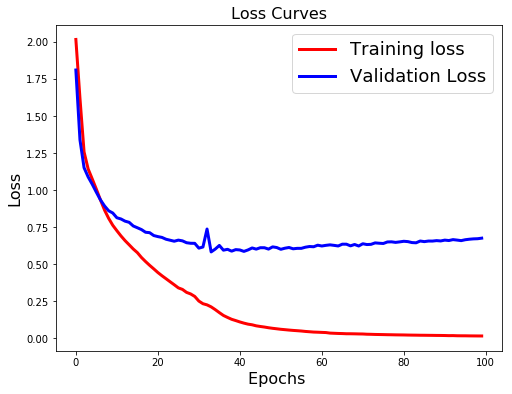

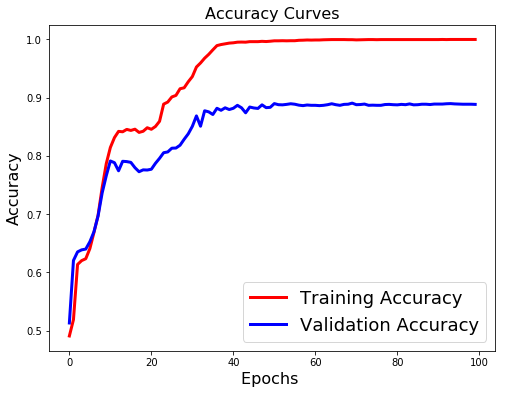

2335/2335 [==============================] - 0s 169us/step


[0.6615332253229439, 0.88993576022235943]

In [6]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#modelo en forma de "tubo", se ira reduciendo las neuronas a la mitad en cada capa
model = Sequential()
model.add(Dense(1024, input_dim=x_tr.shape[1], init='uniform', activation='tanh'))
model.add(Dense(1024, init='uniform', activation='tanh'))
#model.add(Dropout(0.25))

model.add(Dense(512, init='uniform', activation='tanh'))
model.add(Dense(256, init='uniform', activation='tanh'))
#model.add(Dropout(0.20))

model.add(Dense(128, init='uniform', activation='tanh'))
model.add(Dense(64, init='uniform', activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='tanh'))
model.add(Dense(9, activation='tanh'))

model.add(Dense(9, init='uniform', activation='softmax'))




model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t.values,to_categorical(y_t))

In [9]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

# Con datos pre-procesados
model= SVM()
model.set_params(C=10,kernel='rbf')
model.fit(x_tr,y_tr)
yhat_SVM_train = model.predict(x_tr)
yhat_SVM_validation = model.predict(x_v)
yhat_SVM_test = model.predict(x_t)

print("Acc Score Train SVM: %f"%(accuracy_score(y_tr, yhat_SVM_train)))
print("Acc Score Validation SVM: %f"%(accuracy_score(y_v, yhat_SVM_validation)))
print("Acc Score Test SVM: %f"%(accuracy_score(y_t, yhat_SVM_test)))

Acc Score Train SVM: 1.000000
Acc Score Validation SVM: 0.944861
Acc Score Test SVM: 0.947323


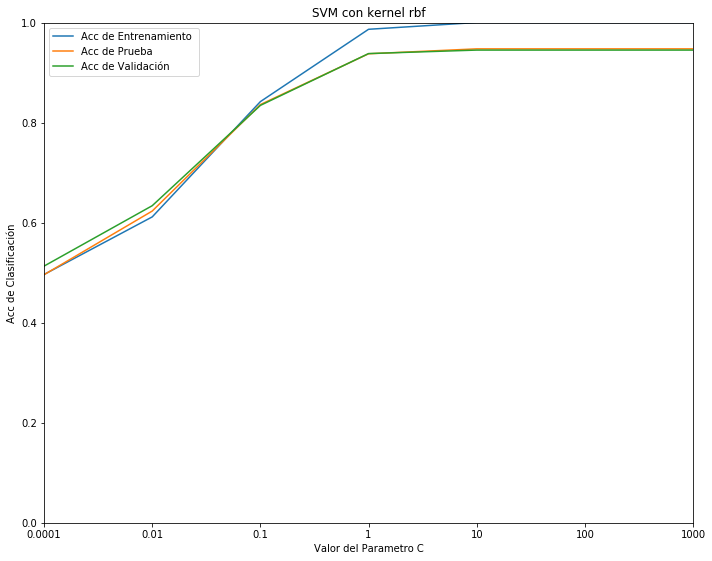

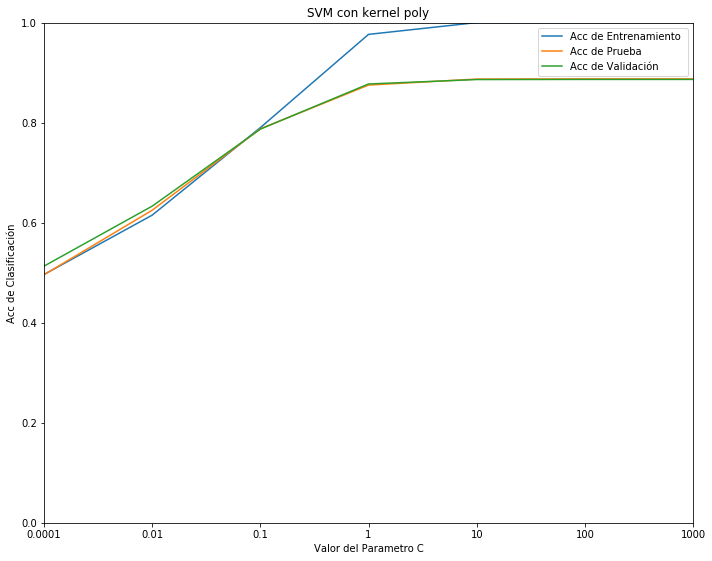

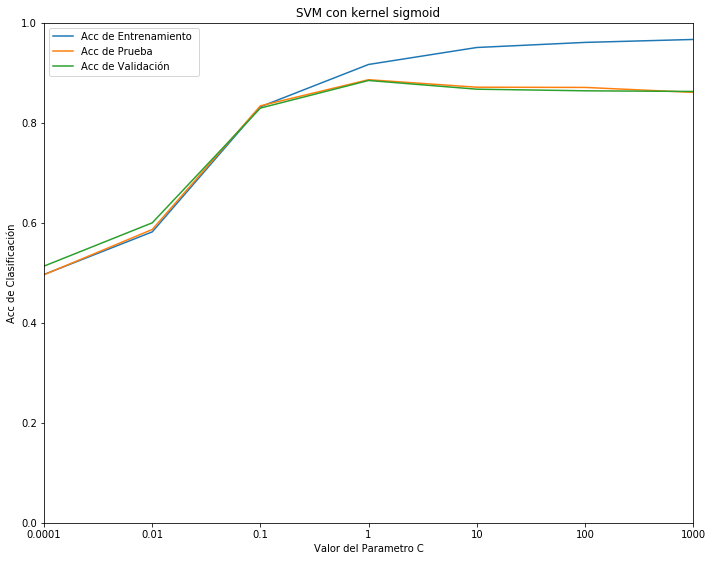

In [8]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

SVM_tarea3('rbf',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('poly',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('sigmoid',x_tr, x_v, x_t, y_tr, y_v , y_t)

In [ ]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

X_train = x_tr.as_matrix().reshape(x_tr.shape[0], 32, 32, 1)
X_val = x_v.as_matrix().reshape(x_v.shape[0], 32, 32, 1)
X_test = x_t.as_matrix().reshape(x_t.shape[0], 32, 32, 1)


#CNN
model_CNN = createModel()
model_CNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_CNN.fit(X_train, to_categorical(y_tr),batch_size=128,epochs=10 , verbose=1,validation_data=(X_val,to_categorical(y_v)))


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model_CNN.evaluate(X_test,to_categorical(y_t))

Train on 5603 samples, validate on 3736 samples
Epoch 1/10
5603/5603 [==============================] - 4538s 810ms/step - loss: 1.9976 - acc: 0.4210 - val_loss: 1.6217 - val_acc: 0.5131
Epoch 2/10
5603/5603 [==============================] - 4557s 813ms/step - loss: 1.8644 - acc: 0.4373 - val_loss: 1.6953 - val_acc: 0.5131
Epoch 3/10
5603/5603 [==============================] - 4322s 771ms/step - loss: 1.8440 - acc: 0.4333 - val_loss: 1.6392 - val_acc: 0.5131
Epoch 4/10
1536/5603 [=======>......................] - ETA: 45:28 - loss: 1.7928 - acc: 0.4609

In [40]:
dataset = np.load('./malimg.npz')
features, labels = load_data_original(dataset=dataset)
#encode_dic = {"0": 0 , '1': 1,'2':2,'3':2,'4':4,'5':5,'6':4,'7':4,'8':1,'9':6,'10':7,'11':1,'12':8,'13':8,'14':8,'15':8,'16':4,'17':6,'18':2,'19':4,'20':6,'21':6,'22':3,'23':6,'24':3}
encode_dic = {0: 0 , 1: 1,2:2,3:2,4:4,5:5,6:4,7:4,8:1,9:6,10:7,11:1,12:8,13:8,14:8,15:8,16:4,17:6,18:2,19:4,20:6,21:6,22:3,23:6,24:3}
new_labels= np.array([encode_dic[x] for x in labels])
new_labels

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([0, 0, 0, ..., 3, 3, 3])

In [47]:
dataset = np.load('./malimg.npz')
features, labels = load_data_original(dataset=dataset)

encode_dic = {0: 0 , 1: 1,2:2,3:2,4:4,5:5,6:4,7:4,8:1,9:6,10:7,11:1,12:8,13:8,14:8,15:8,16:4,17:6,18:2,19:4,20:6,21:6,22:3,23:6,24:3}
new_labels= np.array([encode_dic[x] for x in labels])
new_labels


X_train, X_test, y_train, y_test = train_test_split(features, new_labels, test_size=0.30,stratify=labels)
X_train = X_train.astype(np.float32)

import numpy as np
np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
from dbn.tensorflow import SupervisedDBNClassification

# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[3, 3],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=2,
                                         batch_size=128,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, y_train)

# Save the model
classifier.save('model.pkl')

# Restore it
classifier = SupervisedDBNClassification.load('model.pkl')

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(y_test, Y_pred))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 11699.196289
>> Epoch 2 finished 	RBM Reconstruction error 134082.750000
>> Epoch 3 finished 	RBM Reconstruction error 583321.687500
>> Epoch 4 finished 	RBM Reconstruction error 1646182.875000
>> Epoch 5 finished 	RBM Reconstruction error 3840382.750000
>> Epoch 6 finished 	RBM Reconstruction error 7631130.500000
>> Epoch 7 finished 	RBM Reconstruction error 13776377.000000
>> Epoch 8 finished 	RBM Reconstruction error 23004430.000000
>> Epoch 9 finished 	RBM Reconstruction error 35972584.000000
>> Epoch 10 finished 	RBM Reconstruction error 54205980.000000


KeyboardInterrupt: 

In [36]:
import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score

from dbn.tensorflow import SupervisedDBNClassification


# Loading dataset
digits = load_digits()
X, Y = digits.data, digits.target

# Data scaling
X = (X / 16).astype(np.float32)

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, Y_train)

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 3.290080
>> Epoch 2 finished 	RBM Reconstruction error 2.134917
>> Epoch 3 finished 	RBM Reconstruction error 1.764350
>> Epoch 4 finished 	RBM Reconstruction error 1.566594
>> Epoch 5 finished 	RBM Reconstruction error 1.406127
>> Epoch 6 finished 	RBM Reconstruction error 1.271419
>> Epoch 7 finished 	RBM Reconstruction error 1.240234
>> Epoch 8 finished 	RBM Reconstruction error 1.133777
>> Epoch 9 finished 	RBM Reconstruction error 1.127086
>> Epoch 10 finished 	RBM Reconstruction error 0.988410
>> Epoch 1 finished 	RBM Reconstruction error 2.842748
>> Epoch 2 finished 	RBM Reconstruction error 1.793335
>> Epoch 3 finished 	RBM Reconstruction error 1.539458
>> Epoch 4 finished 	RBM Reconstruction error 1.083720
>> Epoch 5 finished 	RBM Reconstruction error 0.881689
>> Epoch 6 finished 	RBM Reconstruction error 0.810499
>> Epoch 7 finished 	RBM Reconstruction error 0.714582
>> Epoch 8 finished 	RBM Reconstructi